In [22]:

# !pip3 install numpy
# !pip3 install tqdm
# !pip3 install matplotlib

In [11]:
%load_ext autoreload
%autoreload 2
from tests import test_method, confidence_interval, confidence_interval_steps
import matplotlib.pyplot as plt
from case_studies import *
from alg import BFGS, get_point, newton_lin_eq, steepest_lin_eq, generate_A
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
m, n = 4,5
A = generate_A(m,n)
b = np.random.rand(m)


x = np.random.rand(n)
start_x = get_point(A,b,x)

In [15]:
xks, dfs = newton_lin_eq(start_x,f3,df3,Hf3,1.0e-10,A,0.01, 0.5) 

[ 0.98656386  1.29015144 -0.8838824   0.77156213 -2.85679648]
[ 10.00877965 -10.8867206   -5.78435365   9.85558821]
[-0.10110816 -0.13222139  0.09058484 -0.07907368  0.29277927]
[ 3.40514926 -3.67499069 -2.66980265  3.92569363]
[ 0.00877956  0.01148122 -0.00786578  0.00686623 -0.025423  ]
[ 7.69148088 -8.34161431 -5.04219339  8.06091264]
[ 0.00014269  0.0001866  -0.00012784  0.00011159 -0.00041318]
[ 7.34484723 -7.96400895 -4.85563522  7.73082042]
[ 2.74312816e-06  3.58724953e-06 -2.45762367e-06  2.14531859e-06
 -7.94328593e-06]
[ 7.33913212 -7.95778359 -4.85254979  7.72537024]
[ 5.28127743e-08  6.90644360e-08 -4.73160276e-08  4.13032934e-08
 -1.52930136e-07]
[ 7.33902223 -7.95766389 -4.85249045  7.72526543]
[ 1.01681724e-09  1.32971497e-09 -9.10980621e-10  7.95220780e-10
 -2.94440874e-09]
[ 7.33902011 -7.95766158 -4.85248931  7.72526341]
[ 1.95772765e-11  2.56015875e-11 -1.75403059e-11  1.53109616e-11
 -5.66892522e-11]
[ 7.33902007 -7.95766154 -4.85248929  7.72526338]
[ 3.78118434e-13

KeyboardInterrupt: 

## Testing all functions

In [18]:
%autoreload 2
xks1, xks2, xks3,xks4,xks5, i1, i2, i3, i4, i5 = test_method(100, 100, eps=1.0e-8)

  0%|          | 0/100 [00:00<?, ?it/s]


IndexError: tuple index out of range

## Testing one run for debugging

In [ ]:
x = BFGS(np.array([0.8734294 , 0.96854066, 0.86919454, 0.53085569]), f1, df1, 1.0e-8, 0.0001, 0.9)

In [48]:
def make_plot(dfs, title, png):
    plt.plot(confidence_interval(dfs.copy(), 5))
    plt.plot(confidence_interval(dfs.copy(), 50))
    plt.plot(confidence_interval(dfs.copy(), 95))
    plt.title(title)
    plt.yscale('log')    
    plt.xlabel("Iterations")
    plt.ylabel("Mean norm of gradient")
    plt.legend(["5-percentile confidence", "Median", "95-percentile confidence"])
    
    plt.savefig(png)
    plt.show()

In [49]:
def make_subplot(dfs, title, axs):
    axs.plot(confidence_interval(dfs.copy(), 5))
    axs.plot(confidence_interval(dfs.copy(), 50))
    axs.plot(confidence_interval(dfs.copy(), 95))
    axs.set_title(title)
    axs.set_yscale('log')    
    axs.set_xlabel("Iterations")
    axs.set_ylabel("Mean norm of gradient")
    axs.legend(["5-percentile confidence", "Median", "95-percentile confidence"])
    

In [73]:
def make_plot_steps(dfs, title, png):
    plt.plot(confidence_interval_steps(dfs.copy(), 5))
    plt.plot(confidence_interval_steps(dfs.copy(), 50))
    plt.plot(confidence_interval_steps(dfs.copy(), 95))
    plt.title(title)
    #plt.yscale('log')    
    plt.xlabel("Calls to CG")
    plt.ylabel("Average iterations in CG")
    plt.legend(["5-percentile confidence", "Median", "95-percentile confidence"])
    
    plt.savefig(png)
    plt.show()

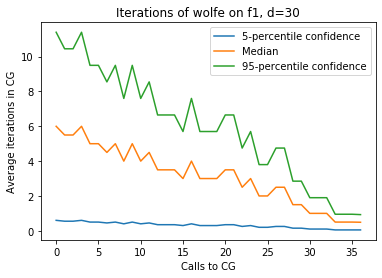

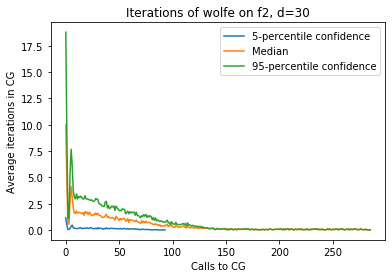

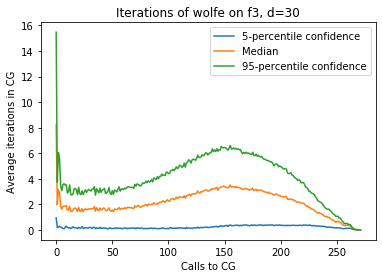

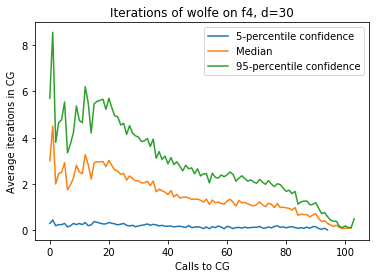

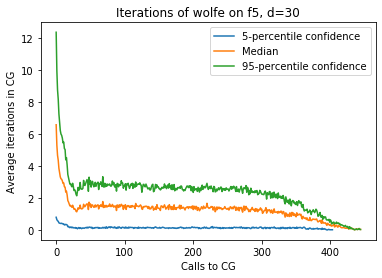

In [82]:
make_plot_steps(i1, "Iterations of wolfe on f1, d=30", "iter_f1_wolfe")
make_plot_steps(i2, "Iterations of wolfe on f2, d=30", "iter_f2_wolfe")
make_plot_steps(i3, "Iterations of wolfe on f3, d=30", "iter_f3_wolfe")
make_plot_steps(i4, "Iterations of wolfe on f4, d=30", "iter_f4_wolfe")
make_plot_steps(i5, "Iterations of wolfe on f5, d=30", "iter_f5_wolfe")

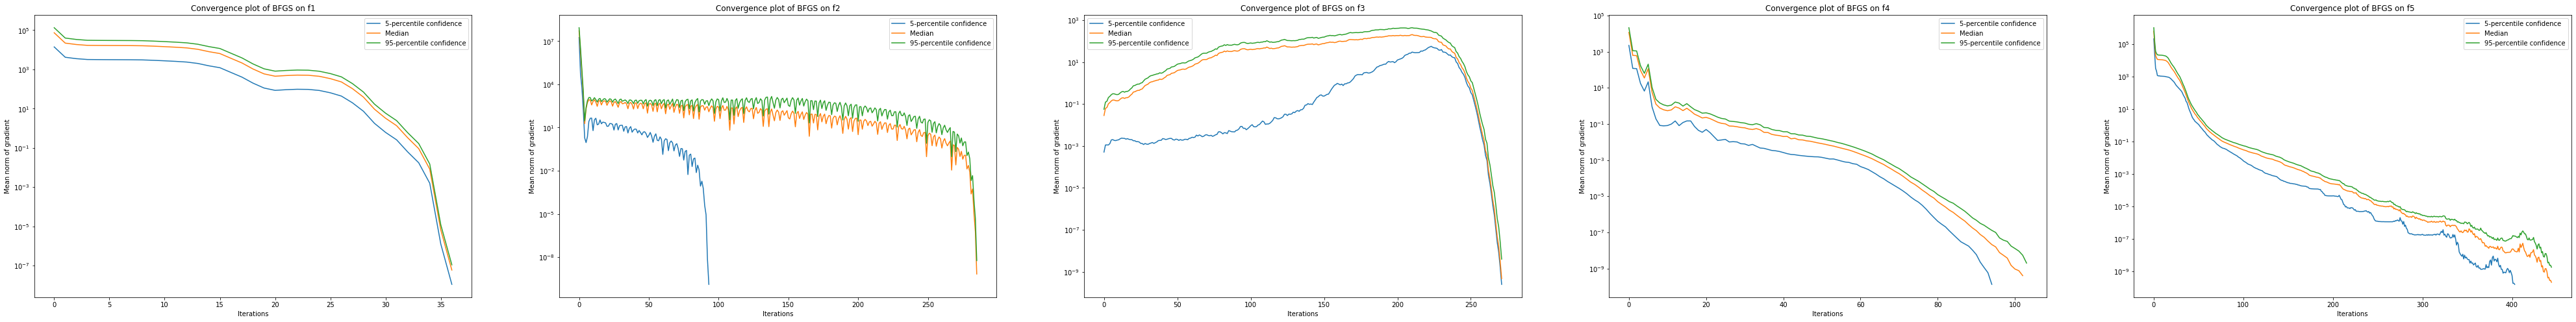

In [83]:
fig, axs = plt.subplots(1, 5, figsize=(70,8))
make_subplot(xks1, "Convergence plot of BFGS on f1", axs[0])
make_subplot(xks2, "Convergence plot of BFGS on f2", axs[1])
make_subplot(xks3, "Convergence plot of BFGS on f3", axs[2])
make_subplot(xks4, "Convergence plot of BFGS on f4", axs[3])
make_subplot(xks5, "Convergence plot of BFGS on f5", axs[4])

plt.savefig("Convergence_plots_100d")
plt.show()

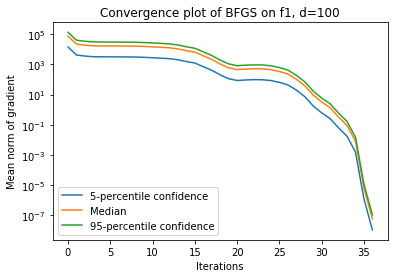

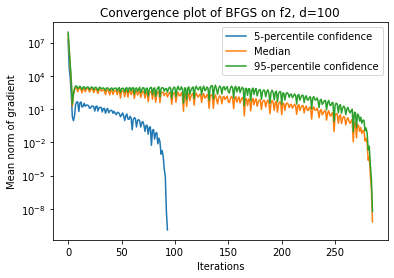

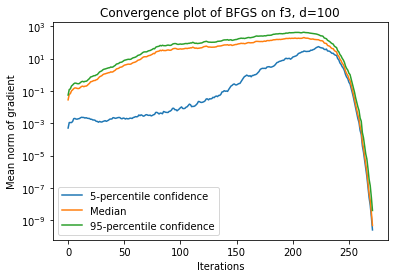

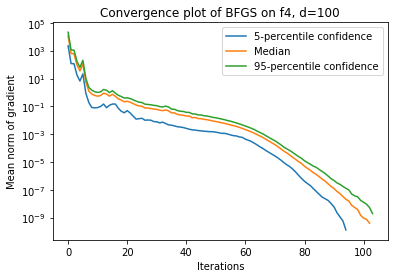

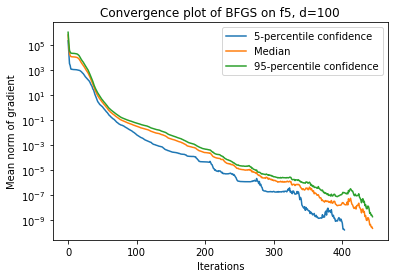

In [85]:
make_plot(xks1, "Convergence plot of BFGS on f1, d=100", "f1_conv_BFGS_c2_025")
make_plot(xks2, "Convergence plot of BFGS on f2, d=100", "f2_conv_BFGS_c2_025")
make_plot(xks3, "Convergence plot of BFGS on f3, d=100", "f3_conv_BFGS_c2_025")
make_plot(xks4, "Convergence plot of BFGS on f4, d=100", "f4_conv_BFGS_c2_025")
make_plot(xks5, "Convergence plot of BFGS on f5, d=100", "f5_conv_BFGS_c2_025")

In [ ]:
fig, axs = plt.subplots(1, 5, figsize=(50,10))
axs[0].plot(confidence_interval(xks1.copy(), 5))
axs[0].plot(confidence_interval(xks1.copy(), 50))
axs[0].plot(confidence_interval(xks1.copy(), 95))
axs[0].set_title("Convergence plot of")
axs[0].set_yscale('log')    
axs[0].set_xlabel("Iterations")
axs[0].set_ylabel("Mean norm of gradient")
axs[0].legend(["5-percentile confidence", "Median", "95-percentile confidence"])

## Test line search


In [ ]:
from alg import wolfe_search